### Train model

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [2]:
file_to_read="data_full_banknote.txt"
df_full_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_full_banknote= df_full_banknote.drop_duplicates()
# put the headers
df_full_banknote.columns=["V1", "V2", "V3", "V4", "class"]
df_full_banknote.drop(["V3", "V4"],axis=1, inplace=True)

In [3]:
df_train_Kmeans, df_test_kmeans = train_test_split(df_full_banknote, test_size = 0.20)


In [4]:
df_train_Kmeans.drop(["class"],axis=1, inplace=True)
np_train_kmeans=np.array(df_train_Kmeans)


In [5]:

kmeans = KMeans(n_clusters=5,init="k-means++", n_init=10, max_iter=100, random_state=None, tol=0.000001).fit(np_train_kmeans)
n_clusters=kmeans.labels_
clusters= kmeans.cluster_centers_

np_bank=np.column_stack((n_clusters, np_train_kmeans))
df_bank=pd.DataFrame(np_bank)

df_bank.columns=("n_cluster", "V1", "V2")


In [6]:
clusters

array([[ 2.64912129,  7.98130978],
       [-2.1800312 , -7.98638743],
       [ 3.42403854, -1.09461731],
       [-3.10634305,  9.48884096],
       [-0.72424633,  1.60682876]])

### merge dataframe to look foward forged banknote

In [7]:

df_train_all=pd.merge(df_full_banknote, df_bank, on=["V1", "V2"], how="left")

<function matplotlib.pyplot.show(close=None, block=None)>

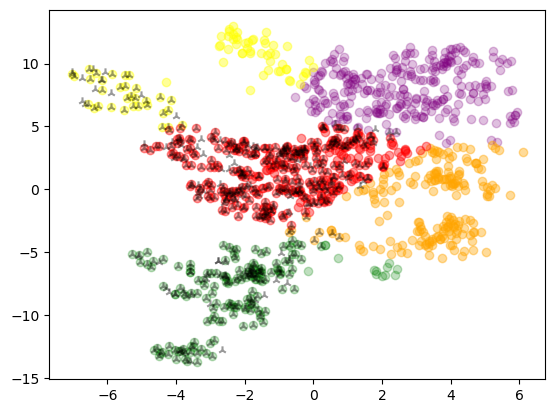

In [8]:
#plot clusters by color and forged are black

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
cluster5=df_bank[df_bank["n_cluster"]==4]

plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="orange", alpha=0.40)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.40)
plt.scatter(cluster5["V1"], cluster5["V2"], c="red", alpha=0.40)
# forged banknote in red

df_forged=df_train_all[df_train_all["class"]==1]

plt.scatter(df_forged["V1"], df_forged["V2"], c="black", alpha=0.40, marker="2")

plt.show

### Clusters color Red and yellow are entirely genuine, cluster colors purple, green and some orange has fake banknote
Try to predict 5 data points from df_test_kmeans 


3.1541 -5.1711 0
4.1454 7.257 0
-0.1269 -1.1505 1
-3.3458 -0.50491 1
-1.7976 -6.7686 1


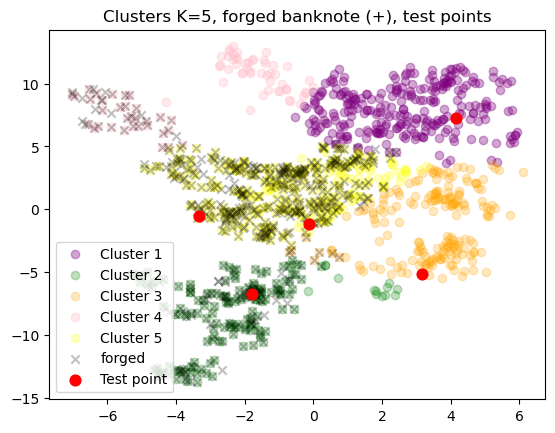

In [28]:
#plot clusters by color and forged are black

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
cluster5=df_bank[df_bank["n_cluster"]==4]

plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.35, label="Cluster 1")
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25, label="Cluster 2")
plt.scatter(cluster3["V1"], cluster3["V2"], c="orange", alpha=0.25, label="Cluster 3")
plt.scatter(cluster4["V1"], cluster4["V2"], c="pink", alpha=0.35, label="Cluster 4")
plt.scatter(cluster5["V1"], cluster5["V2"], c="yellow", alpha=0.25, label="Cluster 5")
# forged banknote in red

df_forged=df_train_all[df_train_all["class"]==1]

plt.scatter(df_forged["V1"], df_forged["V2"], c="black", alpha=0.25, marker="x", label="forged")

plt.scatter(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], c="red", s=60, marker="o", label="Test point")
plt.scatter(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], c="red", s=60, marker="o")
plt.title("Clusters K=5, forged banknote (+), test points")

plt.legend()

df_test_kmeans

plt.show

print(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], df_test_kmeans.iloc[10,2])
print(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], df_test_kmeans.iloc[20,2])
print(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], df_test_kmeans.iloc[40,2])
print(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], df_test_kmeans.iloc[50,2])
print(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], df_test_kmeans.iloc[60,2])

3.1541 -5.1711 0
4.1454 7.257 0
-0.1269 -1.1505 1
-3.3458 -0.50491 1
-1.7976 -6.7686 1


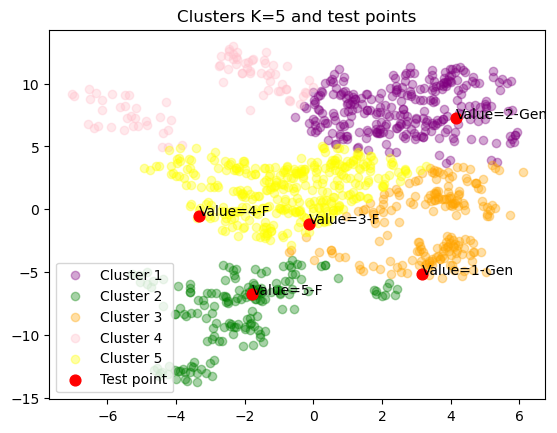

In [27]:
#plot clusters by color and forged are black

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
cluster5=df_bank[df_bank["n_cluster"]==4]

plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.35, label="Cluster 1")
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.35, label="Cluster 2")
plt.scatter(cluster3["V1"], cluster3["V2"], c="orange", alpha=0.35, label="Cluster 3")
plt.scatter(cluster4["V1"], cluster4["V2"], c="pink", alpha=0.35, label="Cluster 4")
plt.scatter(cluster5["V1"], cluster5["V2"], c="yellow", alpha=0.35, label="Cluster 5")


plt.scatter(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], c="red", s=60, marker="o", label="Test point")
plt.scatter(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], c="red", s=60, marker="o")

plt.text(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], "Value=1-Gen")
plt.text(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], "Value=2-Gen")
plt.text(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], "Value=3-F")
plt.text(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], "Value=4-F")
plt.text(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], "Value=5-F")

plt.legend(loc="lower left")
plt.title("Clusters K=5 and test points")
plt.show

print(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], df_test_kmeans.iloc[10,2])
print(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], df_test_kmeans.iloc[20,2])
print(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], df_test_kmeans.iloc[40,2])
print(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], df_test_kmeans.iloc[50,2])
print(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], df_test_kmeans.iloc[60,2])